In [1]:
###import essential libraries
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

In [2]:
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
import warnings
warnings.filterwarnings("ignore")

## Data preprocessing

In [3]:
df = pd.read_csv('远程任务附件data.csv')
df.head()

,y,scr,diploma,home_ownership,car_ownership,location,constellation,grade,index,dk_cnt,tot_amnt,income,gender,occupation,dk_amnt(k),emp_length,dq_cnt
0,0,742,3,1,1,1,Aries,1,3,2,6,2,M,E,16,2,1
1,0,628,3,1,1,1,Capricom,4,9,1,1,1,M,D,66,2,1
2,0,763,4,1,0,1,Capricom,3,3,2,2,1,F,C,21,4,2
3,0,680,2,1,1,1,Virgo,3,3,1,1,3,F,E,71,1,1
4,1,436,1,1,1,1,Taurus,4,1,2,4,2,M,F,93,1,1


In [4]:
# Good No Null Values!
df.isnull().sum().max()

0

In [5]:
df.describe()

,y,scr,diploma,home_ownership,car_ownership,location,grade,index,dk_cnt,tot_amnt,income,dk_amnt(k),emp_length,dq_cnt
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.03997,703.197710,2.149080,0.807310,0.608290,0.707570,3.611300,5.505940,1.935330,2.194920,2.388080,49.426570,2.998790,1.744320
std,0.19589,96.668864,1.193344,0.394414,0.488135,0.454881,1.582914,2.874141,1.006736,1.287774,1.759365,28.805439,1.415863,1.437751
min,0.00000,300.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,0.00000,642.000000,1.000000,1.000000,0.000000,0.000000,3.000000,3.000000,1.000000,1.000000,1.000000,24.000000,2.000000,1.000000
50%,0.00000,722.000000,2.000000,1.000000,1.000000,1.000000,3.000000,6.000000,2.000000,2.000000,2.000000,49.000000,3.000000,1.000000
75%,0.00000,777.000000,3.000000,1.000000,1.000000,1.000000,4.000000,8.000000,2.000000,3.000000,3.000000,74.000000,4.000000,1.000000
max,1.00000,850.000000,5.000000,1.000000,1.000000,1.000000,8.000000,10.000000,6.000000,6.000000,7.000000,99.000000,5.000000,5.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   y               100000 non-null  int64 
 1   scr             100000 non-null  int64 
 2   diploma         100000 non-null  int64 
 3   home_ownership  100000 non-null  int64 
 4   car_ownership   100000 non-null  int64 
 5   location        100000 non-null  int64 
 6   constellation   100000 non-null  object
 7   grade           100000 non-null  int64 
 8   index           100000 non-null  int64 
 9   dk_cnt          100000 non-null  int64 
 10  tot_amnt        100000 non-null  int64 
 11  income          100000 non-null  int64 
 12  gender          100000 non-null  object
 13  occupation      100000 non-null  object
 14  dk_amnt(k)      100000 non-null  int64 
 15  emp_length      100000 non-null  int64 
 16  dq_cnt          100000 non-null  int64 
dtypes: int64(14), object(3)
memory

## No sampling

In [7]:
print('No Frauds', round(df['y'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['y'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 96.0 % of the dataset
Frauds 4.0 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

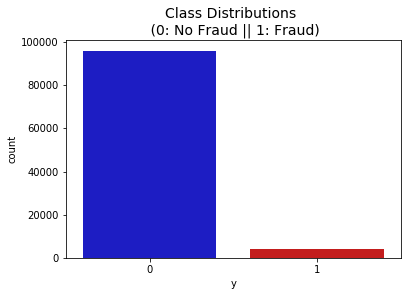

In [8]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('y', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

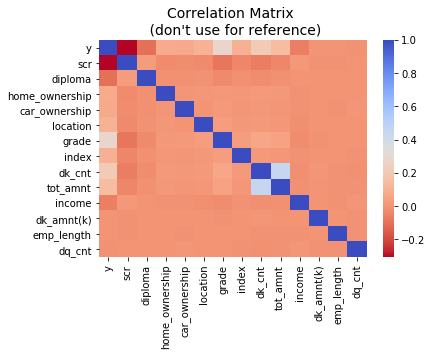

In [9]:
###correlation
# Entire DataFrame
corr = df.corr()
ax = sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})
ax.set_title("Correlation Matrix \n (don't use for reference)", fontsize=14)

plt.show()

## Feature Engineering

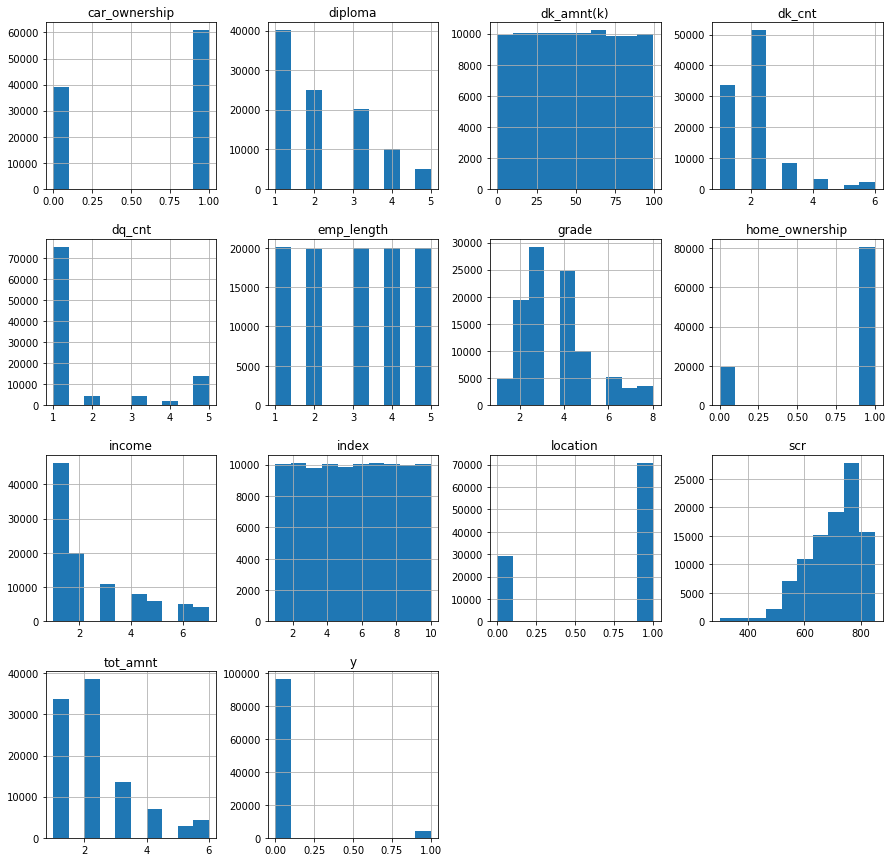

In [10]:

df.hist(figsize = (15,15))
plt.show()

### Feature scaling

In [11]:
##get dummy
n_columns = ['constellation','gender','occupation' ]
dummy_df = pd.get_dummies(df[n_columns])
df = pd.concat([df,dummy_df],axis = 1)
df = df.drop(n_columns, axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype
---  ------                     --------------   -----
 0   y                          100000 non-null  int64
 1   scr                        100000 non-null  int64
 2   diploma                    100000 non-null  int64
 3   home_ownership             100000 non-null  int64
 4   car_ownership              100000 non-null  int64
 5   location                   100000 non-null  int64
 6   grade                      100000 non-null  int64
 7   index                      100000 non-null  int64
 8   dk_cnt                     100000 non-null  int64
 9   tot_amnt                   100000 non-null  int64
 10  income                     100000 non-null  int64
 11  dk_amnt(k)                 100000 non-null  int64
 12  emp_length                 100000 non-null  int64
 13  dq_cnt                     100000 non-null  int64
 14  const

In [12]:
##feature scaling
from sklearn.preprocessing import StandardScaler
ml_df = df
scaler = StandardScaler()
col = df.select_dtypes(include = ['int64','float64']).columns
col = col.drop('y')
ml_df[col] = scaler.fit_transform(df[col])

### Feature selecting

In [13]:
### X and Y
X_feature = list(ml_df.columns)
X_feature.remove('y')
X = ml_df[X_feature]
y = ml_df.y
len(X_feature)

34

In [14]:
from sklearn.feature_selection import RFE
model = LogisticRegression()
rfe = RFE(model,15)
rfe = rfe.fit(X,y)

print(rfe.n_features_)
print(rfe.estimator_ )
print(rfe.support_)
print(rfe.ranking_) #ranking 为 1代表被选中，其他则未被代表未被选中

15
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
[ True  True  True False  True  True  True  True  True False False False
 False False  True False  True False False False False  True False  True
  True  True  True False False False False False False False]
[ 1  1  1  2  1  1  1  1  1 10 18 16 20 15  1 12  1 17 14 11 19  1 13  1
  1  1  1  6  5  3  8  4  9  7]


In [15]:
col_filter = X.columns[rfe.support_]
col_filter
X = X[col_filter]

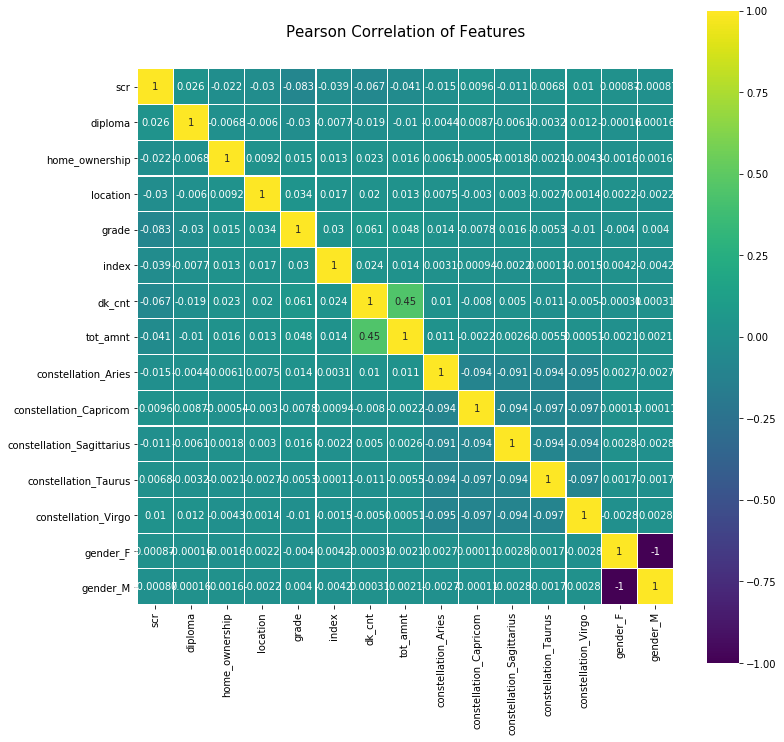

In [16]:
##feature cor
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(ml_df[col_filter].corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [17]:
##Drop the feature with high variance
X.drop('gender_M',axis = 1,inplace = True)
X.head()

,scr,diploma,home_ownership,location,grade,index,dk_cnt,tot_amnt,constellation_Aries,constellation_Capricom,constellation_Sagittarius,constellation_Taurus,constellation_Virgo,gender_F
0,0.401396,0.713059,0.48855,0.642875,-1.649687,-0.871896,0.064238,2.954787,1,0,0,0,0,0
1,-0.777894,0.713059,0.48855,0.642875,0.245561,1.215694,-0.929076,-0.927900,0,1,0,0,0,0
2,0.618633,1.551044,0.48855,0.642875,-0.386188,-0.871896,0.064238,-0.151363,0,1,0,0,0,1
3,-0.239972,-0.124927,0.48855,0.642875,-0.386188,-0.871896,-0.929076,-0.927900,0,0,0,0,1,1
4,-2.764065,-0.962913,0.48855,0.642875,0.245561,-1.567760,0.064238,1.401712,0,0,0,1,0,0


## dealing with unbalanced data

In [18]:
print('No Frauds', round(ml_df['y'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(ml_df['y'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 96.0 % of the dataset
Frauds 4.0 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

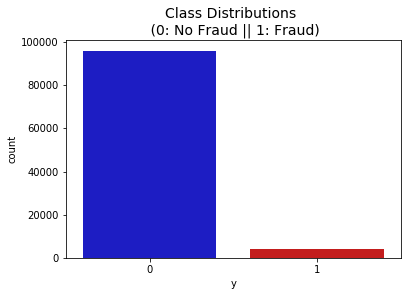

In [19]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('y', data=ml_df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [20]:
## use smote dela with unbalanced data
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X,y = sm.fit_sample(X,y)

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

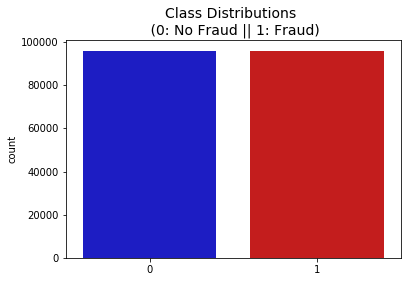

In [21]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(y, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

## Model training

In [22]:
##split training data and test data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
###supervised learning 
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [24]:
###accuracy
from sklearn.model_selection import cross_val_score
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 90.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 96.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 97.0 % accuracy score


In [25]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV

# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

##kNears Regression
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_


# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [26]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)


tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [27]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.9652882148465368
KNears Neighbors:  0.971531712855728
Decision Tree Classifier:  0.8534517033905828


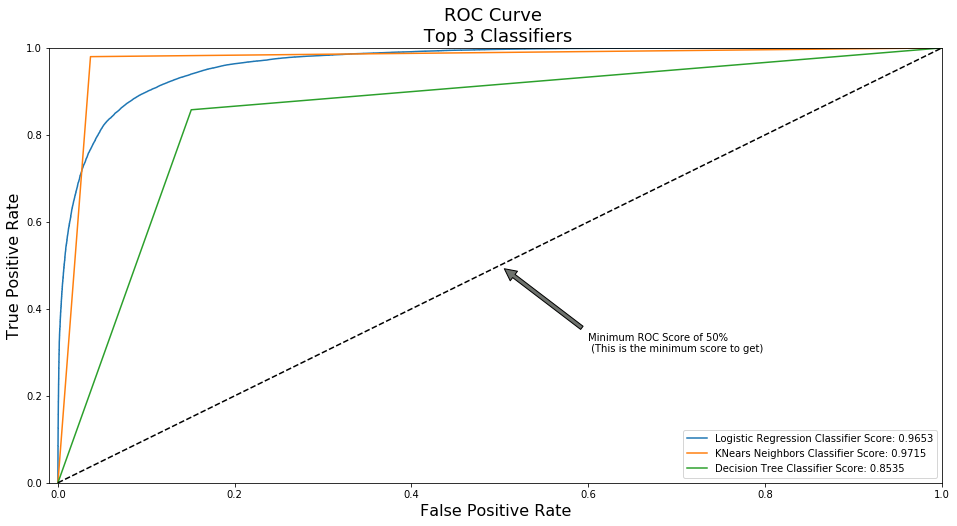

In [28]:
# ROC for cv data
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 3 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, tree_fpr, tree_tpr)
plt.show()

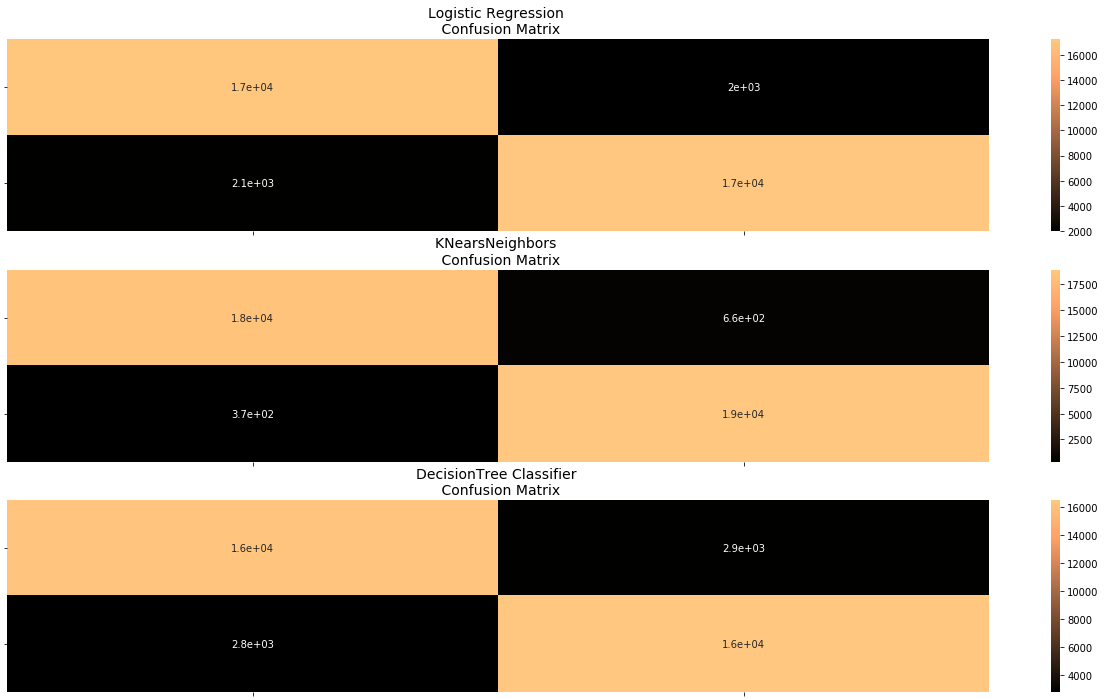

In [31]:
# Confusion_matrix for three models
from sklearn.metrics import confusion_matrix

y_pred_log = log_reg.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(3,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0], annot=True, cmap=plt.cm.copper)
ax[0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[1], annot=True, cmap=plt.cm.copper)
ax[1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1].set_yticklabels(['', ''], fontsize=14, rotation=360)


sns.heatmap(tree_cf, ax=ax[2], annot=True, cmap=plt.cm.copper)
ax[2].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[2].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[2].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()

In [34]:
from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(y_test, y_pred_log))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Decision tree Classifier:')
print(classification_report(y_test, y_pred_tree))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89     19132
           1       0.90      0.89      0.89     19270

   micro avg       0.89      0.89      0.89     38402
   macro avg       0.89      0.89      0.89     38402
weighted avg       0.89      0.89      0.89     38402

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     19132
           1       0.97      0.98      0.97     19270

   micro avg       0.97      0.97      0.97     38402
   macro avg       0.97      0.97      0.97     38402
weighted avg       0.97      0.97      0.97     38402

Decision tree Classifier:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85     19132
           1       0.85      0.86      0.85     19270

   micro avg       0.85      0.85      0.85     38402
   macro avg       0.85      0.85      0.85     38402
weighted 

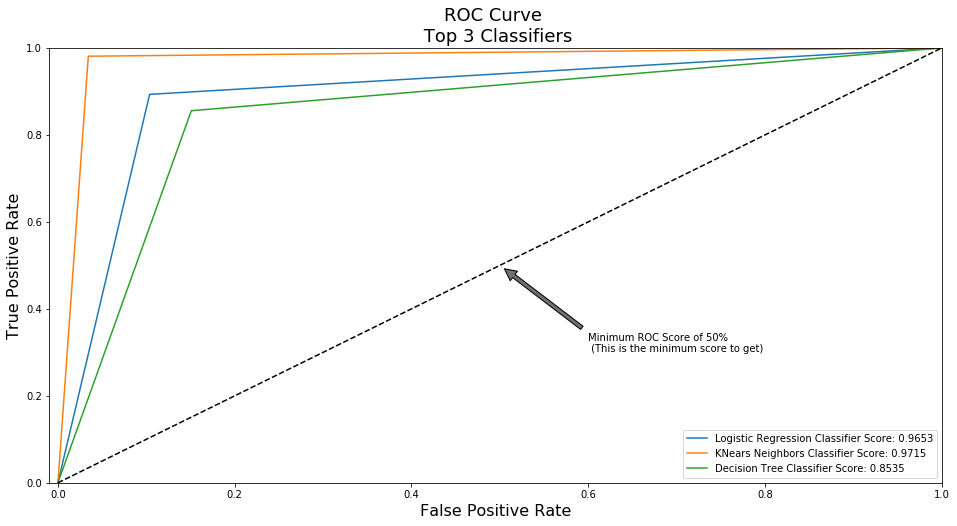

In [35]:
log_fpr, log_tpr, log_thresold = roc_curve(y_test, y_pred_log)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_test, y_pred_knear)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_test, y_pred_tree)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 3 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, tree_fpr, tree_tpr)
plt.show()